# Run these after removing hastag if any on of the given module is missing 

In [1]:
#remove hastag if having problem with gensim
import sys

#!$sys.executable -m pip install keras
#!$sys.executable -m pip install nltk
import nltk

#!$sys.executable -m pip install gensim

#nltk.download('punkt')

#nltk.download('stopwords')

#!$sys.executable -m pip install tensorflow

# Data loading and cleaning

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
DATASET_DIR="Dataset and discription/"

In [4]:
X = pd.read_csv(os.path.join(DATASET_DIR, 'training_set_rel3.tsv'), sep='\t', encoding='ISO-8859-1')

In [5]:
X.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X=X.dropna(axis=1)

In [7]:
X=X.drop(columns=['rater1_domain1','rater2_domain1'])


In [8]:
X

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8
...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35
12972,21628,8,I never understood the meaning laughter is th...,32
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40
12974,21630,8,Trippin' on fen...,40


In [9]:
Y=X['domain1_score']

In [10]:
minimum_scores = np.array([-1, 2, 1, 0, 0, 0, 0, 0, 0])
maximum_scores = np.array([-1, 12, 6, 3, 3, 4, 4, 30, 60])

In [11]:
old_min = minimum_scores[X['essay_set']]
old_max = maximum_scores[X['essay_set']]
old_range = old_max - old_min 
new_range = (10 - 0)  
X['score'] = np.around((((X['domain1_score'] - old_min) * new_range) / old_range) )

X



,essay_id,essay_set,essay,domain1_score,score
0,1,1,"Dear local newspaper, I think effects computer...",8,6.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6.0
...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35,6.0
12972,21628,8,I never understood the meaning laughter is th...,32,5.0
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,7.0
12974,21630,8,Trippin' on fen...,40,7.0


# Tokanization and vectorization functions

In [12]:
from nltk.corpus import stopwords
import nltk

import re
def wordlist(essay, remove_stopwords):
    
    essay = re.sub("[^a-zA-Z]", " ", essay)
    words = essay.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

In [13]:
def Make_sentences(essay, remove_stopwords):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(wordlist(raw_sentence, remove_stopwords))
    return sentences

In [14]:
def makeFeatureVec(words, model, num_features):
    
    featureVec = np.zeros((num_features),dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec,model.wv[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

    

In [15]:
def getAvgFeatureVecs(essays, model, num_features):

    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

# Defining production model

In [16]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from tensorflow.keras.models import Sequential, load_model, model_from_config
import tensorflow.keras.backend as K

def get_model():
    """Define the model."""
    model = Sequential()
    model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.4, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.4))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.summary()

    return model

# Example of pre processing , tokanization then vectorivation

# Example of tokanization

In [17]:
from gensim.models import Word2Vec
# define training data
example2='hi I am an example1 sentence here to explain thw working of above function .Tiwari pakhandi hai,shayad isecay samajh me aa jayega'
example1='hi I am an example22 sentence here to explain thw working of above function. Tiwari pakhandi hai,shayad isecay samajh me aa jayega'
example3='hi I am an example33 sentence here to explain thw working of above function. Tiwari pakhandi hai,shayad isecay samajh me aa jayega'
s=[]
s +=Make_sentences(example1,remove_stopwords=True)
s +=Make_sentences(example2,remove_stopwords=True)
s +=Make_sentences(example3,remove_stopwords=True)
print(s)


[['hi', 'example', 'sentence', 'explain', 'thw', 'working', 'function'], ['tiwari', 'pakhandi', 'hai', 'shayad', 'isecay', 'samajh', 'aa', 'jayega'], ['hi', 'example', 'sentence', 'explain', 'thw', 'working', 'function', 'tiwari', 'pakhandi', 'hai', 'shayad', 'isecay', 'samajh', 'aa', 'jayega'], ['hi', 'example', 'sentence', 'explain', 'thw', 'working', 'function'], ['tiwari', 'pakhandi', 'hai', 'shayad', 'isecay', 'samajh', 'aa', 'jayega']]


C:\Users\sneha\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Example of vectorization

In [18]:
model = Word2Vec(s, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.index_to_key )
print(words)
# access vector for one word
print(model.wv['hi'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, vector_size=100, alpha=0.025)
['jayega', 'aa', 'samajh', 'isecay', 'shayad', 'hai', 'pakhandi', 'tiwari', 'function', 'working', 'thw', 'explain', 'sentence', 'example', 'hi']
[ 7.6937797e-03  9.1159474e-03  1.1371024e-03 -8.3266143e-03
  8.4234700e-03 -3.6967925e-03  5.7412465e-03  4.3951930e-03
  9.6916147e-03 -9.2963111e-03  9.2080925e-03 -9.2849806e-03
 -6.9090333e-03 -9.1020577e-03 -5.5503827e-03  7.3705087e-03
  9.1668312e-03 -3.3259962e-03  3.7265129e-03 -3.6276821e-03
  7.8818426e-03  5.8701234e-03  3.1563587e-07 -3.6258488e-03
 -7.2205034e-03  4.7711711e-03  1.4503270e-03 -2.6101116e-03
  7.8361779e-03 -4.0486371e-03 -9.1493567e-03 -2.2525082e-03
  1.2837682e-04 -6.6368566e-03 -5.4893969e-03 -8.5005304e-03
  9.2295222e-03  7.4223373e-03 -2.9353739e-04  7.3695402e-03
  7.9519944e-03 -7.7969249e-04  6.6087437e-03  3.7650829e-03
  5.0741732e-03  7.2507611e-03 -4.7409856e-03 -2.1847258e-03
  8.7262300e-04  4.2386064e-03  3.3045979e-03  5.0974917e-03
  4.5837699e

# Onto the real model

In [ ]:
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score
import nltk
from gensim.models import Word2Vec
skf = KFold(n_splits=5,shuffle=True)
count=1
results=[]
y_pred_list = []
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, y_test = train_test_split(X,Y, test_size=0.33, shuffle= True)

trainE = X_train['essay']
testE= X_test['essay']
sentences=[]
for essay in trainE:
        # Obtaining all sentences from the training essays.    
    sentences +=Make_sentences(essay, remove_stopwords = True)
        
        #Initializing different parameters for the word2vec model to be used
num_features = 300
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec Model...")
        
#Initializing model fro vectorization
        
    
        #initializing model and loading parameters
    
model = Word2Vec(sentences,vector_size=300, workers=num_workers, min_count = min_word_count, window = context)
        #avoiding normalization to not reduce the essence of some words used in context
    
model.init_sims(replace=True)
    
        #saving model
    
model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)
clean_train = []

for essay in trainE:
    clean_train.append(wordlist(essay, remove_stopwords=True))

trainDataVecs = getAvgFeatureVecs(clean_train, model, num_features)  

clean_test = []
for essay in testE:
    clean_test.append(wordlist(essay, remove_stopwords=True))
                                      
testDataVecs = getAvgFeatureVecs(clean_test, model, num_features)
trainDataVecs = np.array(trainDataVecs)
testDataVecs = np.array(testDataVecs)
trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))        
    
lstm_model = get_model()
        
        
        
history=lstm_model.fit(trainDataVecs, Y_train, batch_size=64, epochs=50,validation_split=0.1)
if count == 5:
    lstm_model.save('./finalnew_lstm.h5')
    
        
       
        
y_pred = lstm_model.predict(testDataVecs)
        
    
y_pred = np.around(y_pred)
y_pred_list.append(y_pred)
            
result = cohen_kappa_score(y_test.values,y_pred,weights='quadratic')
print("Kappa Score: {}".format(result))
results.append(result)

        


In [ ]:
clean_train

In [21]:
sentences.size

AttributeError: 'list' object has no attribute 'size'

# Plotting the data

In [ ]:
print(y_pred)

In [ ]:
print("Average Kappa score after a 5-fold cross validation: ",np.around(np.array(results).mean(),decimals=4))

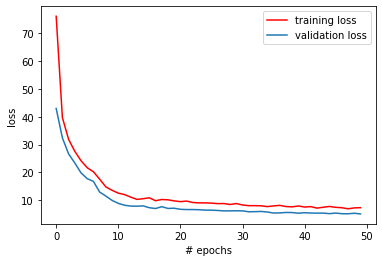

In [22]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
plt.scatter(trainDataVecs[:,:,0],trainDataVecs[:,:,3], c='grey', s=30)


In [ ]:
Xn = pd.read_csv(os.path.join(DATASET_DIR, 'training_set_rel3.tsv'), sep='\t', encoding='ISO-8859-1')

In [ ]:
Xn=Xn['essay']
sent=[]
for essay in Xn:    
    sent +=Make_sentences(essay, remove_stopwords = True)
        

In [23]:
model = Word2Vec(sent,vector_size=300, workers=num_workers, min_count = min_word_count, window = context)

NameError: name 'sent' is not defined

In [24]:
model.wv.save_word2vec_format('word2vecmodel2.bin', binary=True)

In [ ]:
a="Dearlike talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer will help us in life by talking or making friends on line. Many people have myspace, facebooks, aim, these all benefit us by having conversations with one another. Many people believe computers are bad but how can you make friends if you can never talk to them? I am very fortunate for having a computer that can help with not only school work but my social life and how I make friends. Computers help us with finding our locations, coordibates and millions of information online. If we didn't go on the internet a lot we wouldn't know how to go onto websites that @MONTH1 help us with locations and coordinates like @LOCATION1. Would you rather use a computer or be in @LOCATION3. When your supposed to be vacationing in @LOCATION2. Million of information is found on the internet. You can as almost every question and a computer will have it. Would you rather easily draw up a house plan on the computers or take @NUM1 hours doing one by hand with ugly erazer marks all over it, you are garrenteed that to find a job with a drawing like that. Also when appling for a job many workers must write very long papers like a @NUM3 word essay on why this job fits you the most, and many people I know don't like writing @NUM3 words non-stopp for hours when it could take them I hav an a computer. That is why computers we needed a lot now adays. I hope this essay has impacted your descion on computers because they are great machines to work with. The other day I showed my mom how to use a computer and she said it was the greatest invention sense sliced bread! Now go out and buy a computer to help you chat online with friends, find locations and millions of information on one click of t your self with getting a job with neat, prepared, printed work that your boss will love."

In [39]:
lstm_model.load_weights("./finalnew_lstm.h5")
clean_test_essays = []
clean_test_essays.append(wordlist( a, remove_stopwords=True ))
testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )
testDataVecs = np.array(testDataVecs)
testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))
preds = lstm_model.predict(testDataVecs)
print(preds)

OSError: Unable to open file (unable to open file: name = './finalnew_lstm.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans_test = KMeans(n_clusters= 3, init="k-means++", max_iter=500, algorithm = 'auto')
fitted = kmeans_test.fit(X)
prediction = kmeans_test.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=prediction, s=30)
plt.axis('equal')
plt.show()

kmeans_test.cluster_centers_

ValueError: could not convert string to float: "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."